In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Ice_Cream_Selling.csv')

In [3]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
df.shape

(49, 2)

<font size="6" color='pink'>Visualization</font>

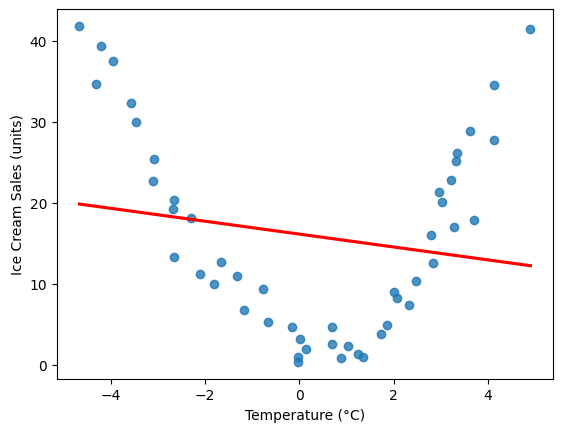

In [5]:
xpoints = df['Temperature (°C)']
ypoints = df['Ice Cream Sales (units)']
sns.regplot(x=xpoints, y=ypoints, line_kws={'color': 'red'}, ci=0)
plt.show()

<font size="6" color='pink'>Data Splitting</font>

In [6]:
X = df['Temperature (°C)'].values.reshape(-1,1)
y = df['Ice Cream Sales (units)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(f'Length of X_train is {len(X_train)}')
print(f'Length of X_test is {len(X_test)}')
print(f'Length of y_train is {len(y_train)}')
print(f'Length of y_test is {len(y_test)}')

Length of X_train is 39
Length of X_test is 10
Length of y_train is 39
Length of y_test is 10


<font size="6" color='pink'>Model Training</font>

In [9]:
model = RandomForestRegressor(random_state=42)

<font size="4" color='yellow'>Grid Search</font>

In [10]:
param_grid = {
    "n_estimators": [100, 200, 500], 
    "max_depth": [5, 10, 20, None], 
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 5], 
    "max_features": ["auto", "sqrt", "log2"]
}

In [11]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2',n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\Dushyant\Downloads\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
253 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dushyant\Downloads\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dushyant\Downloads\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Dushyant\Downloads\Lib\site-packages\sklearn\base.py", line 436, in _vali

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='r2')

In [12]:
best_rfr = grid_search.best_estimator_

In [13]:
y_pred = best_rfr.predict(X_test)

In [14]:
mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
print(f"Error rate is {mape:.2f}%")

Error rate is 49.68%


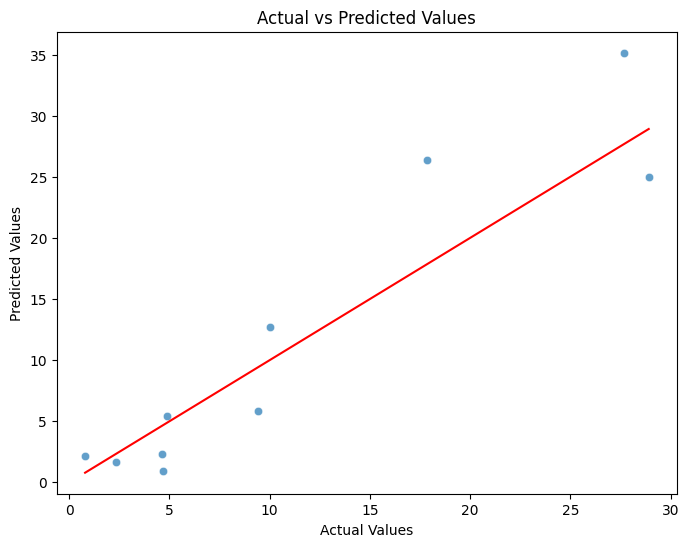

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()